In [1]:
pip install autoviml

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install shap

In [3]:
from __future__ import print_function

In [4]:
import sys,tempfile, urllib, os

In [5]:
import pandas as pd

In [6]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.682. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.46.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [7]:
data = pd.read_csv('kc_house_data.csv')

In [8]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [9]:
size = int(0.7*data.shape[0])
train_df = data[:size]
test_df = data[size:]

In [10]:
# Decide target
target='price'

##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise XGBoost will take too long for 10,000+ rows.
Training Set Shape = (15129, 21)
    Training Set Memory Usage = 2.42 MB
Test Set Shape = (6484, 21)
    Test Set Memory Usage = 1.04 MB
Single_Label Target: ['price']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  13
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  1
    Number of NLP String Co

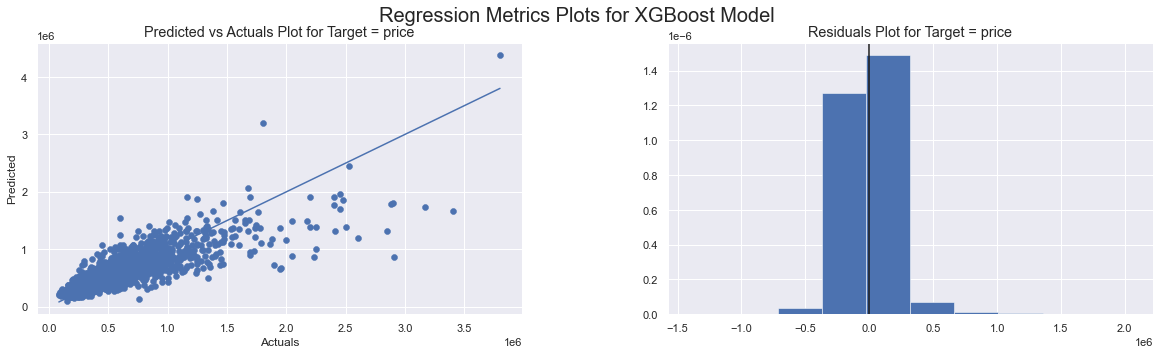

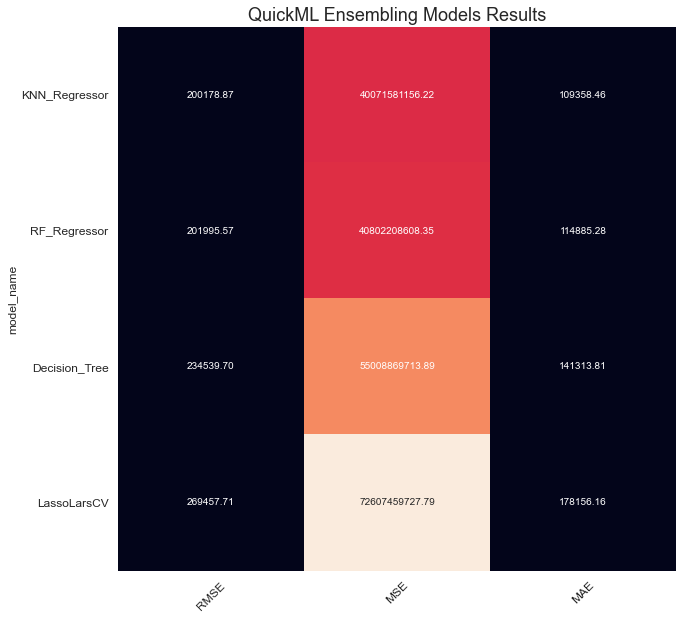

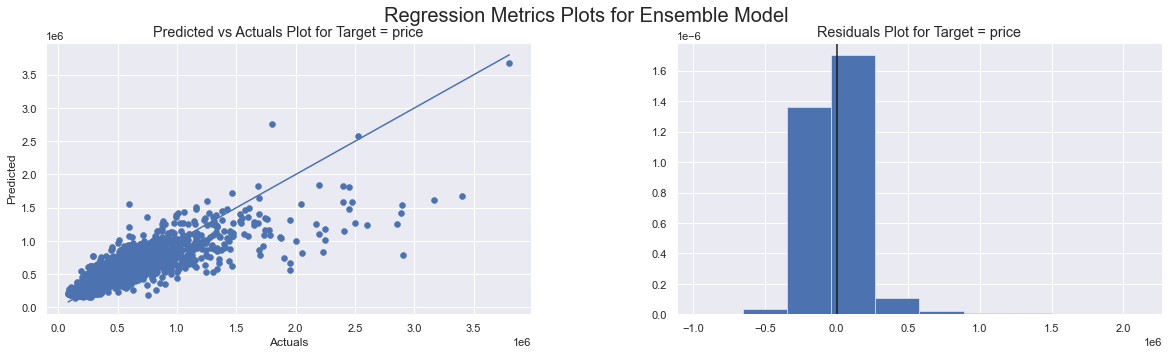

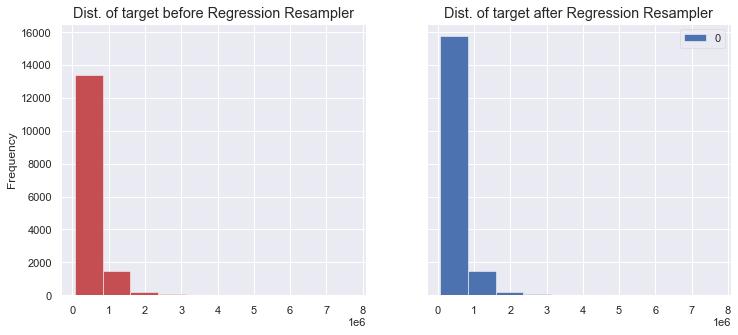

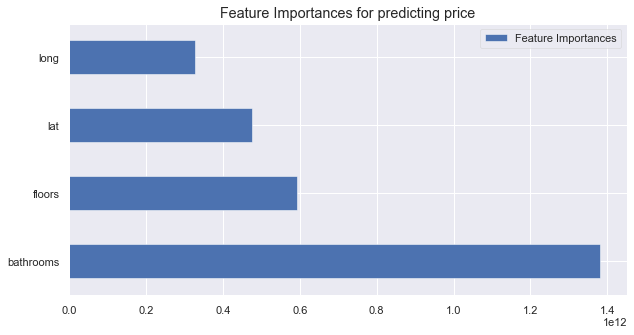

In [11]:
model, features, trainm, testm = Auto_ViML(train_df, target, test_df, sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='RS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=True, 
                                    verbose=1)

In [12]:
features

['bathrooms', 'lat', 'long', 'floors']

In [16]:
from sklearn.metrics import r2_score as R2,mean_squared_error as MSE,mean_absolute_error as MAE

In [17]:
testm

,bathrooms,lat,long,floors,price_LassoLarsCV_predictions,price_Decision_Tree_predictions,price_KNN_Regressor_predictions,price_RF_Regressor_predictions,price_XGBoost_predictions,price_Ensembled_predictions,price_predictions
15129,0.34,0.84,0.18,0.20,"808,859.99","842,978.31","674,212.50","800,707.03","693,432.00","737,560.73","693,432.00"
15130,0.31,0.60,0.31,0.40,"614,029.12","438,710.10","702,500.00","569,925.27","681,841.38","631,566.25","681,841.38"
15131,0.12,0.54,0.20,0.00,"222,357.59","245,062.69","203,356.25","220,736.49","163,986.08","193,432.17","163,986.08"
15132,0.31,0.89,0.19,0.00,"763,484.56","640,082.28","581,875.00","661,943.05","664,189.44","663,017.83","664,189.44"
15133,0.12,0.98,0.27,0.00,"408,237.07","358,332.98","329,581.25","339,210.71","359,474.69","359,157.60","359,474.69"
...,...,...,...,...,...,...,...,...,...,...,...
21608,0.31,0.87,0.14,0.80,"792,150.25","640,082.28","367,306.25","348,579.17","388,474.50","462,751.99","388,474.50"
21609,0.31,0.57,0.13,0.40,"641,773.85","643,600.86","376,486.00","338,739.33","462,921.09","481,535.55","462,921.09"
21610,0.09,0.71,0.18,0.40,"251,934.51","586,328.65","448,187.50","511,474.22","397,099.16","423,290.19","397,099.16"
21611,0.31,0.61,0.37,0.40,"605,830.58","662,675.81","613,668.75","483,125.00","677,050.19","634,187.61","677,050.19"


In [25]:
test_df[target].values

array([937750., 725126., 135000., ..., 402101., 400000., 325000.])

In [28]:
testm['price_predictions'].values

array([693432.  , 681841.4 , 163986.08, ..., 397099.16, 677050.2 ,
       397099.16], dtype=float32)

In [29]:
print(R2(test_df[target].values,testm['price_predictions'].values))

0.6098178128603824
